In [203]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook 

In [300]:
import re
prefix="./Source_rec300Phileball10/rec300Phileball10_1221_0008_"
fName=prefix+"parameters.dat"
print(fName)
row=0
param=open(fName,"r")
for line in param:
    splitted=re.split('[: ]',line)
    print(splitted)
    row+=1
    if splitted[0]=="FLP":
        FLP=splitted[1]
        BP=splitted[3]
        RBP=splitted[5]
        break
FLP=int(FLP)
BP=int(BP)
RBP=int(RBP)
print(FLP, BP, RBP)
print(FLP+BP+4)


./Source_rec300Phileball10/rec300Phileball10_1221_0008_parameters.dat
['Source', 'Image', 'rec300Phileball10.png\n']
['FLP', '34320', 'BP', '2178', 'OBP', '80\n']
34320 2178 80
36502


In [303]:
import sys

fName=prefix+"data.dat"
readFile = open(fName,"r")
spaceCount=0
indexCount=0
pIndex=0
targetIndex=371
array =np.zeros((FLP,10))
arrayRigid=np.zeros((RBP, 10))
arrayWall=np.zeros((BP, 10))

for line in readFile:
    if line=='\n':
        spaceCount+=1
    if indexCount==targetIndex and spaceCount==0:
        splitted=line.split()
        for j in range(10):
            array[pIndex][j]=splitted[j]
        pIndex+=1
    if spaceCount==2:
        indexCount+=1
        spaceCount=0
    if indexCount>targetIndex:
        break
print(pIndex)
readFile.close()

px=np.zeros(FLP)
py=np.zeros(FLP)
vx=np.zeros(FLP)
vy=np.zeros(FLP)
vabs=np.zeros(FLP)
for i in range(FLP):
    px[i]=array[i][1]
    py[i]=array[i][2]
    vx[i]=array[i][3]
    vy[i]=array[i][4]
    vabs[i]=array[i][5]


#Rigid Body
spaceCount=0
indexCount=0
pIndex=0
readFile = open(fName,"r")
for line in readFile:
    if line=='\n':
        spaceCount+=1
    if indexCount==targetIndex+1 and spaceCount==0:
        splitted=line.split()
        for j in range(10):
            arrayRigid[pIndex][j]=splitted[j]
        pIndex+=1
    if spaceCount==2:
        indexCount+=1
        spaceCount=0
    if indexCount>targetIndex+1:
        break

readFile.close()
rpx=np.zeros(RBP)
rpy=np.zeros(RBP)
rvx=np.zeros(RBP)
rvy=np.zeros(RBP)
rvabs=np.zeros(RBP)
for i in range(RBP):
    rpx[i]=arrayRigid[i][1]
    rpy[i]=arrayRigid[i][2]
    rvx[i]=arrayRigid[i][3]
    rvy[i]=arrayRigid[i][4]
    rvabs[i]=arrayRigid[i][5]
print(pIndex)

#wall 
spaceCount=0
indexCount=0
pIndex=0
readFile = open(fName,"r")
for line in readFile:
    if line=='\n':
        spaceCount+=1
    if spaceCount!=0:
        break;
    splitted=line.split()
    for j in range(10):
        arrayWall[pIndex][j]=splitted[j]
    pIndex+=1
   
bpx=np.zeros(BP)
bpy=np.zeros(BP)
bvx=np.zeros(BP)
bvy=np.zeros(BP)
bvabs=np.zeros(BP)
for i in range(BP):
    bpx[i]=arrayWall[i][1]
    bpy[i]=arrayWall[i][2]
    bvx[i]=arrayWall[i][3]
    bvy[i]=arrayWall[i][4]
    bvabs[i]=arrayWall[i][5]
print(pIndex)

34320
80
2178


<IPython.core.display.Javascript object>


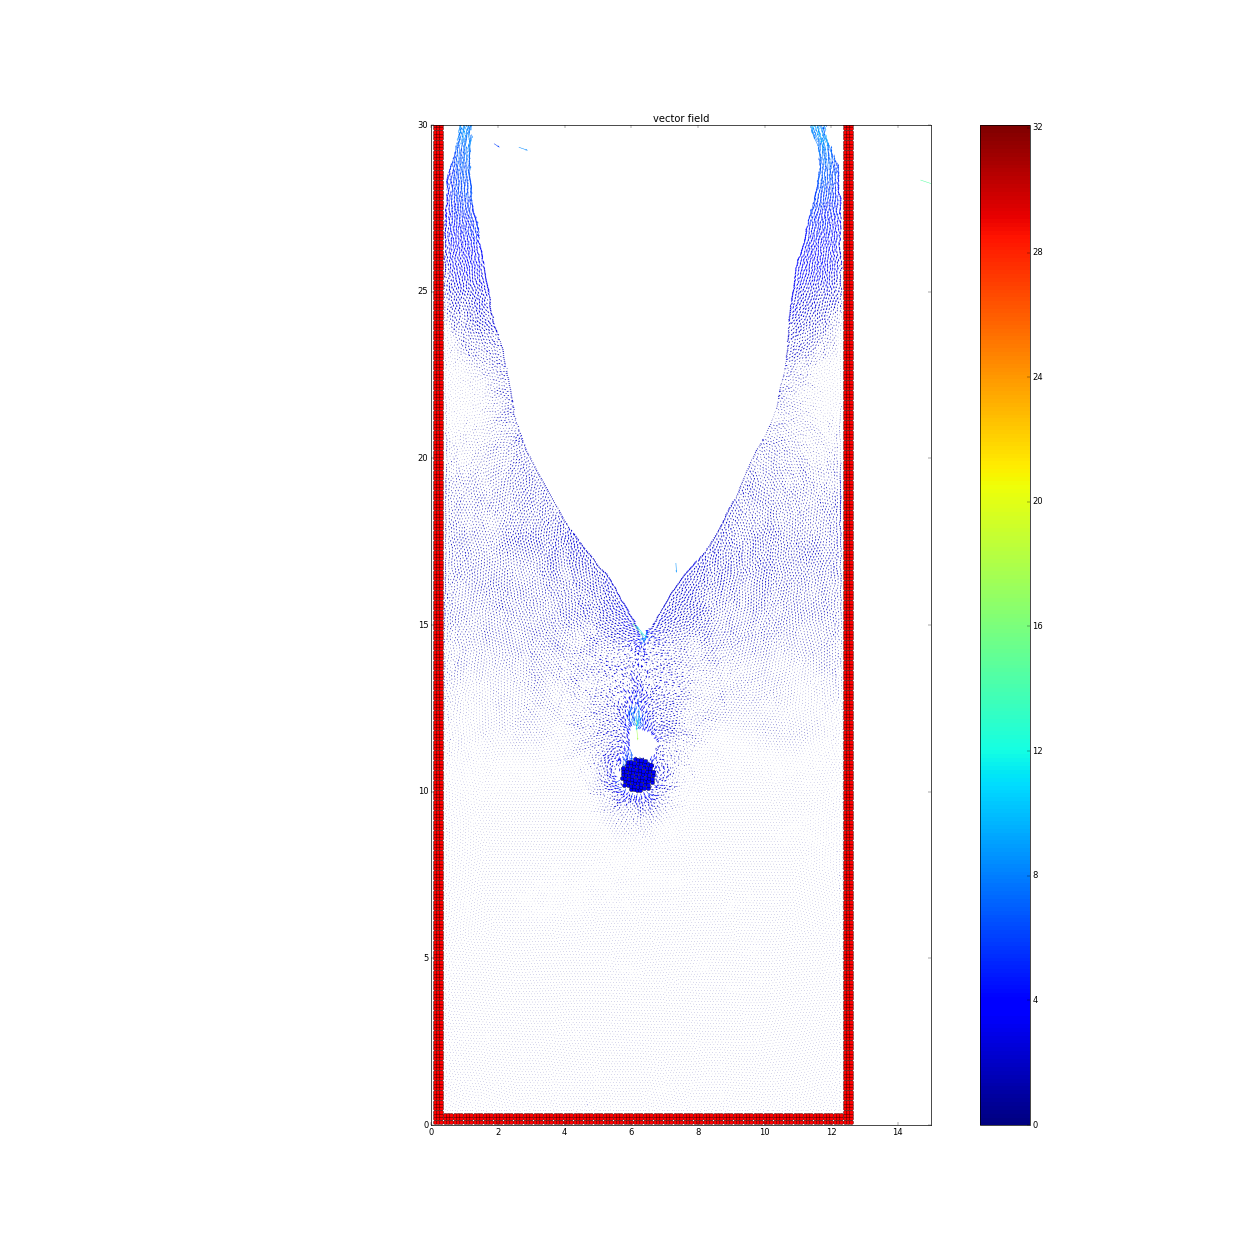

In [304]:
plt.figure(figsize=(25,25), dpi=50)
q=plt.quiver(px, py, vx, vy, vabs, color='red', angles='xy', width=0.001, cmap=plt.cm.jet)
plt.plot(bpx, bpy, "o", color='red')
plt.plot(rpx, rpy, "o")
plt.title("vector field")
plt.ylim(0,30)
plt.xlim(0,15)
plt.colorbar(q, cmap=plt.cm.jet)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [179]:
for i in range(FLP):
    if py[i]<-1:
        vx[i]=0
        vy[i]=0
        print(i)

print(np.average(vx))
print(np.average(vy))

rms_vx=0
rms_vy=0
for i in range(FLP):
    rms_vx+=vx[i]*vx[i]
    rms_vy+=vy[i]*vy[i]

print("root mean square")
rms_vx=np.sqrt(rms_vx/float(FLP))
rms_vy=np.sqrt(rms_vy/float(FLP))

print(rms_vx, rms_vy)

-7.21702984554e-05
-0.0371725221976
root mean square
0.0703226187385 0.0828276075092


In [187]:
rvy

array([-5.11479666, -5.11479568, -5.11479469, -5.11479371, -5.1165167 ,
       -5.11651571, -5.11651473, -5.11651375, -5.11651276, -5.11651178,
       -5.11651079, -5.11650981, -5.11823477, -5.11823378, -5.1182328 ,
       -5.11823181, -5.11823083, -5.11822985, -5.11822886, -5.11822788,
       -5.11995382, -5.11995284, -5.11995185, -5.11995087, -5.11994988,
       -5.1199489 , -5.11994791, -5.11994693, -5.11994594, -5.11994496,
       -5.12167189, -5.1216709 , -5.12166992, -5.12166894, -5.12166795,
       -5.12166697, -5.12166598, -5.121665  , -5.12166401, -5.12166303,
       -5.12338996, -5.12338897, -5.12338799, -5.123387  , -5.12338602,
       -5.12338503, -5.12338405, -5.12338307, -5.12338208, -5.1233811 ,
       -5.12510803, -5.12510704, -5.12510606, -5.12510507, -5.12510409,
       -5.1251031 , -5.12510212, -5.12510113, -5.12510015, -5.12509916,
       -5.12682511, -5.12682412, -5.12682314, -5.12682216, -5.12682117,
       -5.12682019, -5.1268192 , -5.12681822, -5.12854318, -5.12

In [118]:
plt.plot(py, vabs)

In [104]:
plt.colorbar?

In [15]:
test=open("analyzerTest.dat","w")
for i in range(7):
    for j in range(3):
        string='%d %d.%d %d.%d %d.%d\n'%(i+1, (j)*10,i+1, (j+1)*10,i+1, (j+2)*100,i+1)
        test.write(string)
    string='\n\n'
    test.write(string)
test.close()